# 数据读取

In [3]:
import numpy as np  
import pandas as pd  
%matplotlib inline
path = r'D:\Documents\python_documents\Practical Business Data Analysis\case\CH5\ceilphone.csv'
data = pd.read_csv(path)  
data.head()

,score,W1,W2,W3,W4,W5,W6,W7
0,3,Nokia,0,0,0,1,1,3
1,4,Nokia,1,0,1,0,1,5
2,4,Nokia,0,1,1,0,0,7
3,4,Bird,1,1,0,1,0,3
4,3,Bird,0,0,0,0,1,5


# 描述性分析

In [2]:
len(data)   #样本数为1451

1451

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 8 columns):
score    1451 non-null int64
W1       1451 non-null object
W2       1451 non-null int64
W3       1451 non-null int64
W4       1451 non-null int64
W5       1451 non-null int64
W6       1451 non-null int64
W7       1451 non-null int64
dtypes: int64(7), object(1)
memory usage: 90.8+ KB


## 交叉表：按指定的行列统计频数——看消费者打分与不同品牌之间的关系。

In [4]:
pd.crosstab(data.score,data.W1)

W1,Bird,Motorola,Nokia,Samsung
score,,,,
1,37,24,34,26
2,80,64,53,66
3,98,138,132,133
4,109,108,116,96
5,28,30,35,44


## 通过交叉表看得分(score)与游戏个数W7的关系

In [5]:
pd.crosstab(data.score,data.W7)

W7,3,5,7
score,,,
1,25,67,29
2,71,113,79
3,169,187,145
4,155,111,163
5,64,9,64


## 分析消费者打分（score）和手机有无数码相机（W1）功能之间的关系

In [7]:
W2_0 = data['W2'].groupby(data.score).value_counts()[:,0]   #无数码相机时不同得分各自对应的数量
W2_1 = data['W2'].groupby(data.score).value_counts()[:,1]   #有数码相机时不同得分各自对应的数量
W2_0,W2_1

(score
 1     69
 2    162
 3    259
 4    181
 5     58
 Name: W2, dtype: int64, score
 1     52
 2    101
 3    242
 4    248
 5     79
 Name: W2, dtype: int64)

In [8]:
a = pd.concat([W2_0, W2_1], axis=1)
a.columns = ['W2_0', 'W2_1']
a

,W2_0,W2_1
score,,
1,69,52
2,162,101
3,259,242
4,181,248
5,58,79


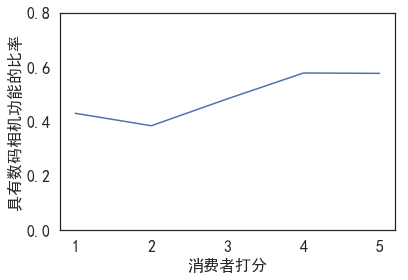

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体sns.set(font=myfont.get_name(), style="white")
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style='white')                      #seaborn解决中文乱码的问题
plt.rcParams['axes.unicode_minus']=False      #显示负号
plt.rcParams['figure.figsize'] = (6.0, 4.0)   #调整图片大小

W2_0 = data['W2'].groupby(data.score).value_counts()[:,0]   #无数码相机时不同得分各自对应的数量
W2_1 = data['W2'].groupby(data.score).value_counts()[:,1]   #有数码相机时不同得分各自对应的数量
a = pd.concat([W2_0, W2_1], axis=1)
a.columns = ['W2_0', 'W2_1']
p = plt.plot(a.index, a.W2_1/(a.W2_0+a.W2_1), linestyle="-")

plt.ylabel('具有数码相机功能的比率', fontsize=16)
plt.xlabel('消费者打分', fontsize=16)
plt.xticks(a.index, ('1', '2', '3', '4', '5'), fontsize=16)  #设置x刻度值的字体大小
plt.yticks(np.arange(0, 1, 0.2), fontsize=16)                #设置y轴刻度值的字体大小
  
plt.show()

## 消费者得分与其他功能之间的关系

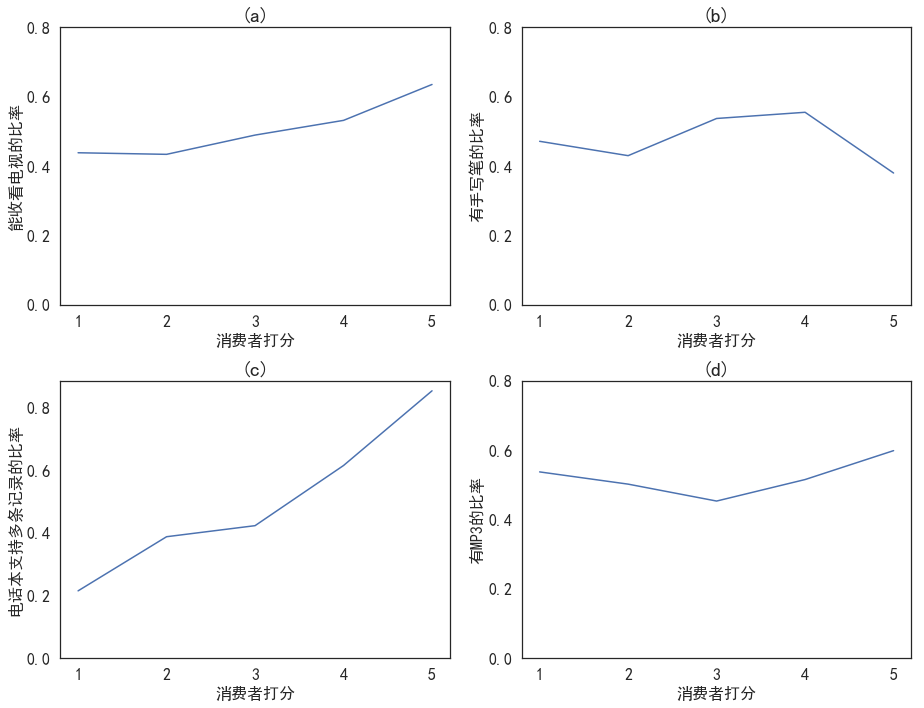

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()                                            #设置seaborn默认格式
    
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style="white")       #seaborn解决中文乱码的问题
plt.rcParams['axes.unicode_minus']=False             #显示负号

plt.rcParams['figure.figsize'] = (13, 10)             #设定图片大小
f = plt.figure()                                     #确定画布

f.add_subplot(2,2,1)
W3_0 = data['W3'].groupby(data.score).value_counts()[:,0]
W3_1 = data['W3'].groupby(data.score).value_counts()[:,1]
W3_0,W3_1
W3_S= pd.concat([W3_0, W3_1], axis=1)
W3_S.columns = ['W3_0', 'W3_1']
p1 = plt.plot(W3_S.index, W3_S.W3_1/(W3_S.W3_0+W3_S.W3_1), linestyle="-")
plt.ylabel('能收看电视的比率', fontsize=16)
plt.xlabel('消费者打分', fontsize=16)
plt.xticks(a.index, ('1', '2', '3', '4', '5'), fontsize=16)  #设置x刻度值的字体大小
plt.yticks(np.arange(0, 1, 0.2), fontsize=16)                #设置y轴刻度值的字体大小
plt.title('(a)', fontsize=20)

f.add_subplot(2,2,2)
W4_0 = data['W4'].groupby(data.score).value_counts()[:,0]
W4_1 = data['W4'].groupby(data.score).value_counts()[:,1]
W4_0,W4_1
W4_S= pd.concat([W4_0, W4_1], axis=1)
W4_S.columns = ['W4_0', 'W4_1']
p2 = plt.plot(W4_S.index, W4_S.W4_1/(W4_S.W4_0+W4_S.W4_1), linestyle="-")
plt.ylabel('有手写笔的比率', fontsize=16)
plt.xlabel('消费者打分', fontsize=16)
plt.xticks(a.index, ('1', '2', '3', '4', '5'), fontsize=16)  #设置x刻度值的字体大小
plt.yticks(np.arange(0, 1, 0.2), fontsize=16)                #设置y轴刻度值的字体大小
plt.title("(b)", fontsize=20)

f.add_subplot(2,2,3)
W5_0 = data['W5'].groupby(data.score).value_counts()[:,0]
W5_1 = data['W5'].groupby(data.score).value_counts()[:,1]
W5_0,W5_1
W5_S= pd.concat([W5_0, W5_1], axis=1)
W5_S.columns = ['W5_0', 'W5_1']
p3 = plt.plot(W5_S.index, W5_S.W5_1/(W5_S.W5_0+W5_S.W5_1), linestyle="-")
plt.ylabel('电话本支持多条记录的比率', fontsize=16)
plt.xlabel('消费者打分', fontsize=16)
plt.xticks(a.index, ('1', '2', '3', '4', '5'), fontsize=16)  #设置x刻度值的字体大小
plt.yticks(np.arange(0, 1, 0.2), fontsize=16)                #设置y轴刻度值的字体大小
plt.title("(c)", fontsize=20)

f.add_subplot(2,2,4)
W6_0 = data['W6'].groupby(data.score).value_counts()[:,0]
W6_1 = data['W6'].groupby(data.score).value_counts()[:,1]
W6_0,W6_1
W6_S= pd.concat([W6_0, W6_1], axis=1)
W6_S.columns = ['W6_0', 'W6_1']
p4 = plt.plot(W6_S.index, W6_S.W6_1/(W6_S.W6_0+W6_S.W6_1), linestyle="-")
plt.ylabel('有MP3的比率', fontsize=16)
plt.xlabel('消费者打分', fontsize=16)
plt.xticks(a.index, ('1', '2', '3', '4', '5'), fontsize=16)  #设置x刻度值的字体大小
plt.yticks(np.arange(0, 1, 0.2), fontsize=16)                #设置y轴刻度值的字体大小
plt.title("(d)", fontsize=20)

#plt.subplots_adjust(wspace=0.3)                    #调整两幅子图的间距
plt.tight_layout()
plt.savefig('定序回归：4幅折线图.png',dpi=600)      #保存png格式图片
plt.show()

In [70]:
import statsmodels.discrete.discrete_model as sm

In [84]:
data.head()

,score,W1,W2,W3,W4,W5,W6,W7
0,3,Nokia,0,0,0,1,1,3
1,4,Nokia,1,0,1,0,1,5
2,4,Nokia,0,1,1,0,0,7
3,4,Bird,1,1,0,1,0,3
4,3,Bird,0,0,0,0,1,5


In [96]:
data.head()

,score,W1,W2,W3,W4,W5,W6,W7
0,3,Nokia,0,0,0,1,1,3
1,4,Nokia,1,0,1,0,1,5
2,4,Nokia,0,1,1,0,0,7
3,4,Bird,1,1,0,1,0,3
4,3,Bird,0,0,0,0,1,5


In [106]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

glm1_1999_logit = smf.glm('score~W1 +  W2 + W3 + W4 + W5 + W6 + W7', data,
                          family=sm.families.Binomial(sm.families.links.logit))
res_logit = glm1_1999_logit.fit()
print(res_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  score   No. Observations:                 1451
Model:                            GLM   Df Residuals:                     1441
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 16 Jul 2019   Deviance:                          nan
Time:                        17:06:06   Pearson chi2:                 3.75e+19
No. Iterations:                   100   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.394e+17    8.1e+06   5.42e+10      0.000    4.39e+17    4.39e+17
W1[T.Motorola]  1.222e+17   6.11e+06    

D:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
D:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
D:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
D:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: invalid value encountered in add
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
D:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:933: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
D:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:933: RuntimeWarning: invalid value 